In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
from EDA_functions import *



In [2]:
#to use functions from scripts in the image processing folder
import sys
from pathlib import Path
sys.path.insert(0, str(Path(sys.path[0]).parent.absolute())+"/image_processing")
from image_processing import load_MRI_gifs, extract_box, stacked_boxes


In [3]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [5]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [6]:
df['CDR'].fillna(0, inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,436.0,51.357798,25.269862,18.000,23.00000,54.000,74.00000,96.000
Educ,235.0,3.178723,1.311510,1.000,2.00000,3.000,4.00000,5.000
SES,216.0,2.490741,1.120593,1.000,2.00000,2.000,3.00000,5.000
MMSE,235.0,27.063830,3.696870,14.000,26.00000,29.000,30.00000,30.000
CDR,436.0,0.153670,0.315150,0.000,0.00000,0.000,0.00000,2.000
eTIV,436.0,1481.919725,158.740866,1123.000,1367.75000,1475.500,1579.25000,1992.000
nWBV,436.0,0.791670,0.059937,0.644,0.74275,0.809,0.84200,0.893
ASF,436.0,1.198894,0.128682,0.881,1.11175,1.190,1.28425,1.563
Delay,20.0,20.550000,23.862490,1.000,2.75000,11.000,30.75000,89.000


<AxesSubplot:xlabel='Age', ylabel='Count'>

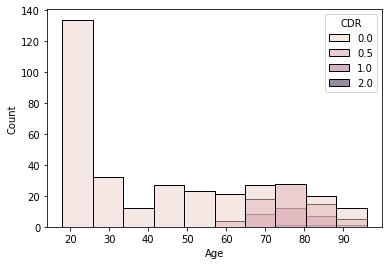

In [8]:
sns.histplot(data=df, x="Age", hue="CDR")

In [9]:
young(df).describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,161.000000,0.0,0.0,0.0,161.0,161.000000,161.000000,161.000000,19.000000
mean,22.490683,NaN,NaN,NaN,0.0,1512.826087,0.846509,1.174696,21.105263
std,3.025141,NaN,NaN,NaN,0.0,150.301263,0.019162,0.122740,24.383270
min,18.000000,NaN,NaN,NaN,0.0,1131.000000,0.777000,0.917000,1.000000
25%,20.000000,NaN,NaN,NaN,0.0,1432.000000,0.837000,1.103000,2.500000
50%,22.000000,NaN,NaN,NaN,0.0,1514.000000,0.847000,1.161000,12.000000
75%,24.000000,NaN,NaN,NaN,0.0,1591.000000,0.858000,1.227000,33.500000
max,30.000000,NaN,NaN,NaN,0.0,1913.000000,0.893000,1.551000,89.000000


In [10]:
tra, sag, cor= load_MRI_gifs(df["ID"], "all")

In [11]:
#all labels
df["labels"]= df['CDR']!=0

In [12]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,labels
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,False
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,False
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,True
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,0.0,1588,0.803,1.105,NaN,False
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,0.0,1737,0.848,1.010,NaN,False


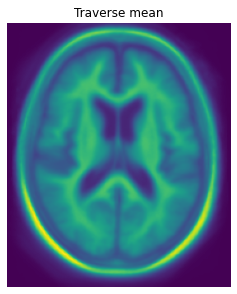

In [13]:
img_mean(load_MRI_gifs(demented(df)["ID"], "traverse"), title= "Traverse mean")

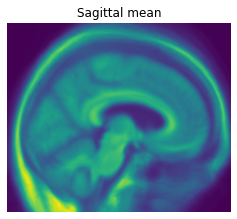

In [14]:
img_mean(load_MRI_gifs(demented(df)["ID"], "sagittal"), title= "Sagittal mean")

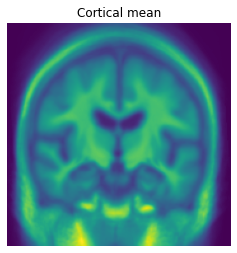

In [15]:
img_mean(load_MRI_gifs(demented(df)["ID"], "cortical"), title= "Cortical mean")

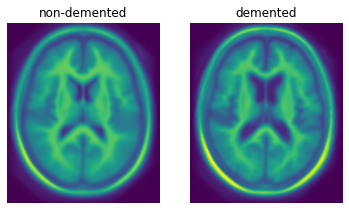

In [16]:
compare_two_means(
    load_MRI_gifs(non_demented(df)["ID"], "traverse"),
    load_MRI_gifs(demented(df)["ID"], "traverse"), 
    "non-demented", "demented", vmax=120)

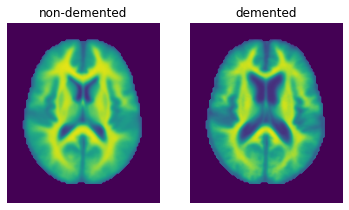

In [17]:
compare_two_means(
    load_MRI_gifs(non_demented(df)["ID"], "mask"),
    load_MRI_gifs(demented(df)["ID"], "mask"), 
    "non-demented", "demented", vmax=120)

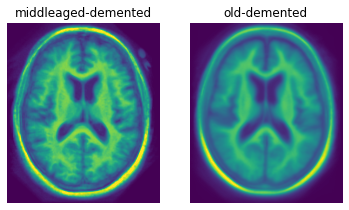

In [18]:
compare_two_means(
    load_MRI_gifs(middleaged(demented(df))["ID"], "traverse"),
    load_MRI_gifs(old(demented(df))["ID"], "traverse"), 
    "middleaged-demented", "old-demented", vmax=120)

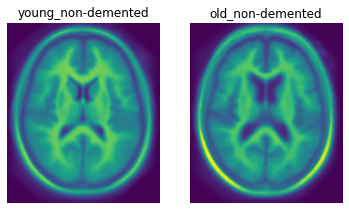

In [19]:
compare_two_means(
    load_MRI_gifs(young(non_demented(df))["ID"], "traverse"), 
    load_MRI_gifs(old(non_demented(df))["ID"], "traverse"), 
    "young_non-demented", "old_non-demented", vmax=120)

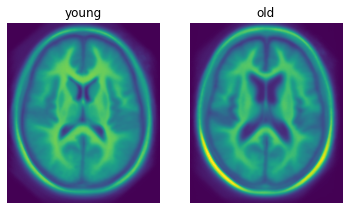

In [20]:
compare_two_means(
    load_MRI_gifs(young(df)["ID"], "traverse"), 
    load_MRI_gifs(old(df)["ID"], "traverse"), 
    "young", "old", all=False, vmax=120)

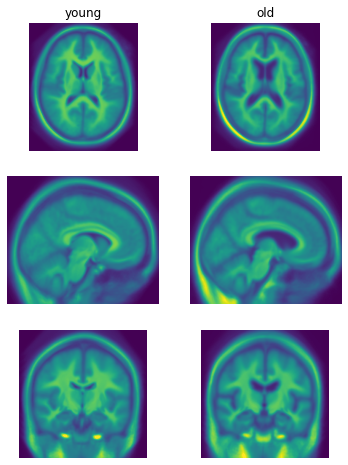

In [21]:
compare_two_means(
    load_MRI_gifs(young(df)["ID"], "all"), 
    load_MRI_gifs(old(df)["ID"], "all"), 
    "young", "old", all=True, vmax=120)

In [36]:
#check dimensions of all images
tra_info=[]
for i, img in enumerate(tra):
    tra_info.append([df["ID"][i], img.min(), img.max(), img.mean().round(1), np.median(img), img.shape[0], img.shape[1]])
tra_info

[['OAS1_0001_MR1', 0, 189, 40.1, 34.0, 208, 176],
 ['OAS1_0002_MR1', 0, 206, 49.7, 50.0, 208, 176],
 ['OAS1_0003_MR1', 0, 187, 39.4, 33.0, 208, 176],
 ['OAS1_0004_MR1', 0, 194, 42.3, 43.0, 208, 176],
 ['OAS1_0005_MR1', 0, 155, 41.4, 44.0, 208, 176],
 ['OAS1_0006_MR1', 0, 190, 48.9, 50.0, 208, 176],
 ['OAS1_0007_MR1', 0, 156, 41.7, 45.0, 208, 176],
 ['OAS1_0009_MR1', 0, 158, 38.1, 41.0, 208, 176],
 ['OAS1_0010_MR1', 0, 175, 39.1, 34.0, 208, 176],
 ['OAS1_0011_MR1', 0, 191, 44.0, 42.0, 208, 176],
 ['OAS1_0012_MR1', 0, 181, 46.1, 47.0, 208, 176],
 ['OAS1_0013_MR1', 0, 163, 35.0, 25.0, 208, 176],
 ['OAS1_0014_MR1', 0, 184, 42.6, 44.0, 208, 176],
 ['OAS1_0015_MR1', 0, 221, 46.8, 42.0, 208, 176],
 ['OAS1_0016_MR1', 0, 187, 40.6, 37.0, 208, 176],
 ['OAS1_0017_MR1', 0, 238, 48.7, 51.0, 208, 176],
 ['OAS1_0018_MR1', 0, 193, 48.6, 48.0, 208, 176],
 ['OAS1_0019_MR1', 0, 214, 45.0, 37.0, 208, 176],
 ['OAS1_0020_MR1', 0, 194, 40.2, 37.0, 208, 176],
 ['OAS1_0021_MR1', 0, 228, 41.1, 32.0, 208, 176],


In [37]:
pd.DataFrame(tra_info, columns=["ID", "img_min", "img_max", "img_mean", "img_median", "height", "width"])

,ID,img_min,img_max,img_mean,img_median,height,width
0,OAS1_0001_MR1,0,-67,40.1,34.0,208,176
1,OAS1_0002_MR1,0,-50,49.7,50.0,208,176
2,OAS1_0003_MR1,0,-69,39.4,33.0,208,176
3,OAS1_0004_MR1,0,-62,42.3,43.0,208,176
4,OAS1_0005_MR1,0,-101,41.4,44.0,208,176
...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,0,-122,40.2,43.0,208,176
432,OAS1_0353_MR2,0,-127,36.2,34.0,208,176
433,OAS1_0368_MR2,0,-36,44.7,46.0,208,176
434,OAS1_0379_MR2,0,-82,45.2,47.0,208,176


In [24]:
tra[0].max()

189

In [25]:
#check dimensions of all images
dim_sag=[]
for i in sag:
    dim_sag.append(i.shape)
pd.DataFrame(dim_sag).describe().T

,count,mean,std,min,25%,50%,75%,max
0,436.0,176.0,0.0,176.0,176.0,176.0,176.0,176.0
1,436.0,208.0,0.0,208.0,208.0,208.0,208.0,208.0


In [26]:
#check dimensions of all images
dim_cor=[]
for i in cor:
    dim_cor.append(i.shape)
pd.DataFrame(dim_cor).describe().T

,count,mean,std,min,25%,50%,75%,max
0,436.0,176.0,0.0,176.0,176.0,176.0,176.0,176.0
1,436.0,176.0,0.0,176.0,176.0,176.0,176.0,176.0
